In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

DATA Collection and Pre-processing

In [ ]:
car_data = pd.read_csv('/content/car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.shape

(301, 9)

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [ ]:
print(car_data.Fuel_Type.value_counts())
print(car_data.Selling_type.value_counts())
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
car_data.replace({'Selling_type':{'Dealer':0, 'Individual':1}},inplace=True)
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

/tmp/ipython-input-2804512826.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}},inplace=True)
/tmp/ipython-input-2804512826.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Selling_type':{'Dealer':0, 'Individual':1}},inplace=True)
/tmp/ipython-input-2804512826.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Driven_kms  ...  Selling_type  Transmission  Owner
0    2014           5.59       27000  ...             0             0      0
1    2013           9.54       43000  ...             0             0      0
2    2017           9.85        6900  ...             0             0      0
3    2011           4.15        5200  ...             0             0      0
4    2014           6.87       42450  ...             0             0      0
..    ...            ...         ...  ...           ...           ...    ...
296  2016          11.60       33988  ...             0             0      0
297  2015           5.90       60000  ...             0             0      0
298  2009          11.00       87934  ...             0             0      0
299  2017          12.50        9000  ...             0             0      0
300  2016           5.90        5464  ...             0             0      0

[301 rows x 7 columns]


In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training
Linear Regression

In [ ]:
linear_reg = LinearRegression()

In [ ]:
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Train_data_prediction = linear_reg.predict(X_train)

In [ ]:
error = metrics.r2_score(Y_train, Train_data_prediction)*100
print("R squared Error: ", error)

R squared Error:  87.96483009370215


In [ ]:
mean_error = metrics.mean_squared_error(Y_train, Train_data_prediction)
print("Mean Squared Error: ", mean_error)

Mean Squared Error:  3.267089578793354


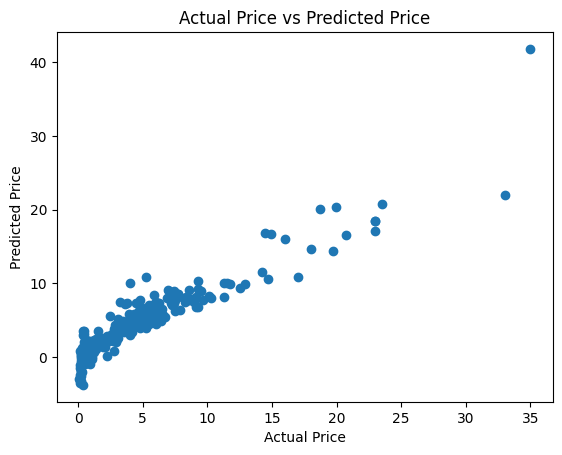

In [ ]:
plt.scatter(Y_train, Train_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction = linear_reg.predict(X_test)

In [ ]:
error = error = metrics.r2_score(Y_test, test_data_prediction)*100
print("R squared Error: ", error)

R squared Error:  83.65861023210704


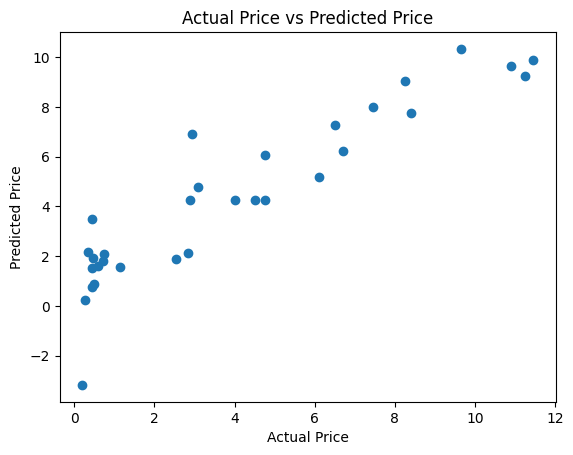

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Lasso Regression

In [ ]:
lasso_reg_model = Lasso()

In [ ]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [ ]:
Train_data_prediction1 = lasso_reg_model.predict(X_train)

In [ ]:
error = error = metrics.r2_score(Y_train, Train_data_prediction1)*100
print("R squared Error: ", error)

R squared Error:  84.24480718240743


In [ ]:
mean_error = metrics.mean_squared_error(Y_train, Train_data_prediction1)
print("Mean Squared Error: ", mean_error)

Mean Squared Error:  4.2769339084528495


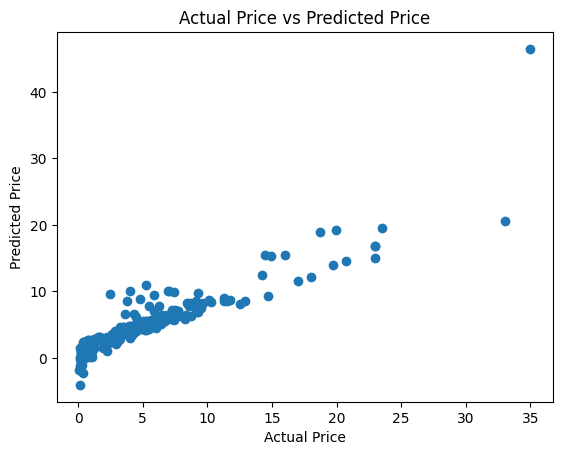

In [ ]:
plt.scatter(Y_train, Train_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_data_prediction1 = lasso_reg_model.predict(X_test)

In [ ]:
error = metrics.r2_score(Y_test, test_data_prediction1)*100
print("R squared Error: ", error)

R squared Error:  87.09763132343396


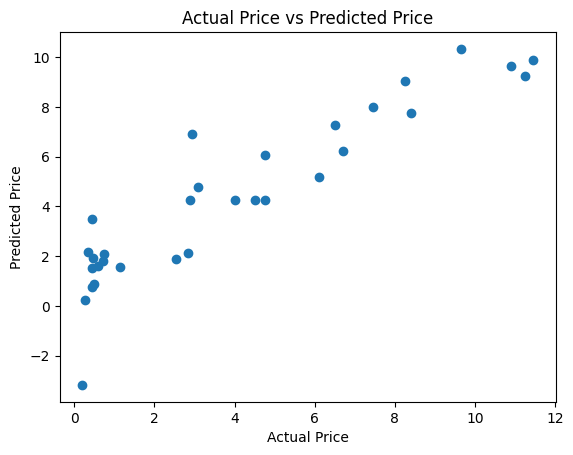

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()